<a href="https://colab.research.google.com/github/nilakshi104/Classifying-name-with-character-level-RNN/blob/master/character_level_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import unicode_literals,print_function,division
from io import open
import glob
import os
import unicodedata
import string
import torch
import torch.nn as nn

In [2]:
path='/content/drive/My Drive/data/character level RNN/data/names/*.txt'
path1='/content/drive/My Drive/data/character level RNN/data/names/Arabic.txt'

In [3]:
all_letters=string.ascii_letters+" .,;'"
n_letters=len(all_letters)
n_letters

57

In [4]:
all_categories=[]
category_lines={}

def readLines(filename):
    lines = open(filename, encoding='utf-8').read().strip().split('\n')
    return lines

for filename in glob.glob(path):
  category=filename.split('/')[-1].split('.')[0]
  all_categories.append(category)
  lines=readLines(filename)
  category_lines[category]=lines

n_categories = len(all_categories)


In [5]:
print(category_lines['Italian'][:5])

['Abandonato', 'Abatangelo', 'Abatantuono', 'Abate', 'Abategiovanni']


In [6]:
def letterToIndex(letter):
  return all_letters.find(letter)

def letterToTensor(letter):
  tensor=torch.zeros(1,n_letters)
  tensor[0,letterToIndex(letter)]=1
  return tensor

# print(letterToTensor('c'))

def lineToTensor(line):
  tensor=torch.zeros(1,len(line)*n_letters)
  for li,letter in enumerate(line):
    tensor[0,li*n_letters+letterToIndex(letter)]=1
  return tensor

print(lineToTensor('ab'))

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0.]])


In [7]:
class RNN (nn.Module):
  def __init__ (self,input_size,hidden_size,output_size):
    super(RNN, self).__init__()   #This is calling the __init__() method of the parent class of RNN, in this case, nn.Module.
    self.hidden_size=hidden_size
    self.i2h=nn.Linear(input_size+hidden_size ,hidden_size)
    self.i2o=nn.Linear(input_size+hidden_size,output_size)
    self.softmax=nn.LogSoftmax (dim=1)
  
  def forward(self,input,hidden,n_letters):
    # print(input.size(),hidden.size())
    for i in range(0,input.size()[1],n_letters):
      combined=torch.cat((input[0,i:i+n_letters].unsqueeze(0),hidden),1)
      # combineds.append(combined)
      # print(combined.size())
      hidden=self.i2h(combined)
      # print(hidden.size())
      output=self.i2o(combined)
      # print(output.size())
      output=self.softmax(output)
  
    return output

  def initHidden(self):
    return torch.zeros(1,self.hidden_size)

n_hidden=128
rnn=RNN(n_letters,n_hidden,n_categories)
input=lineToTensor('Albert')
hidden=rnn.initHidden()
output=rnn(input,hidden,n_letters)
print(output)
output[0]

tensor([[-2.8390, -2.8608, -2.9001, -2.9104, -2.9159, -2.8583, -2.9651, -2.8411,
         -2.8517, -2.9351, -2.8398, -2.8511, -2.7774, -2.8238, -3.0104, -3.0071,
         -2.8912, -2.9857]], grad_fn=<LogSoftmaxBackward>)


tensor([-2.8390, -2.8608, -2.9001, -2.9104, -2.9159, -2.8583, -2.9651, -2.8411,
        -2.8517, -2.9351, -2.8398, -2.8511, -2.7774, -2.8238, -3.0104, -3.0071,
        -2.8912, -2.9857], grad_fn=<SelectBackward>)

In [8]:
def categoryFromOutput(output):
  all_categoriess=[]
  for i in range(len(output)):
    top_n,top_i=output[i].topk(1)
    category_i=top_i.item()
  return all_categories[category_i],category_i
  
categoryFromOutput(output)
# output

('German', 12)

In [26]:

import random

def randomChoice(l):
  return l[random.randint(0,len(l)-1)]

def randomTrainingExample():
  category=randomChoice(all_categories)
  line=randomChoice(category_lines[category])
  category_tensor=torch.tensor([all_categories.index(category)],dtype=torch.long)   #64-bit integer (signed)  {torch.int64 or torch.long}

  line_tensor=lineToTensor(line)
  return category,line,category_tensor,line_tensor

data=[]
target=[]
Category=[]
Line=[]
for i in range(400):
    datas=[]
    targets=[]
    Categories=[]
    Lines=[]
    for j in range(5):
      category, line, category_tensor, line_tensor = randomTrainingExample()
      datas.append(line_tensor)
      targets.append(category_tensor)
      Categories.append(category)
      Lines.append(line)

      # print(category_tensor)
    data.append(datas)
    target.append(targets)
    Category.append(Categories)
    Line.append(Lines)
   
# Line

In [10]:
# target[0][0]
# data[0][0].size()
hidden=rnn.initHidden()
      # print(int(line_tensor[i][j].size()[1]/n_letters))
output=rnn(data[0][0],hidden,n_letters)
# print(data[1][1])
# lineToTensor('ALbert')
output

tensor([[-2.8529, -2.9383, -2.9572, -2.8226, -2.8145, -2.8360, -2.9619, -2.8935,
         -2.8445, -2.8463, -2.8488, -2.9075, -2.7516, -2.8968, -2.9249, -2.9882,
         -2.9875, -2.9953]], grad_fn=<LogSoftmaxBackward>)

0,0% 1.1088 Errington / English ✓
0,0% 2.0003 Maguire / French ✗ (Irish)
0,0% 1.0713 La / Vietnamese ✓
0,0% 0.5772 Metrofanis / Greek ✓
0,0% 0.3772 Salvaggi / Italian ✓
1,0% 0.5669 Luong / Vietnamese ✓
1,0% 4.1196 Laar / Arabic ✗ (Dutch)
1,0% 1.3186 Kuang / Vietnamese ✗ (Chinese)
1,0% 0.1650 Malinowski / Polish ✓
1,0% 1.1532 Nunes / Portuguese ✓
2,0% 1.3317 Karube / Japanese ✓
2,0% 0.6421 Guo / Chinese ✓
2,0% 1.1640 San / Vietnamese ✗ (Korean)
2,0% 0.3039 Shim / Korean ✓
2,0% 2.0268 Moseley / French ✗ (English)
3,0% 0.9912 Valencia / Spanish ✓
3,0% 0.1143 Babakhanov / Russian ✓
3,0% 0.6172 Quang / Vietnamese ✓
3,0% 1.6829 Teague / Arabic ✗ (Irish)
3,0% 1.2942 Letsos / Greek ✓
4,1% 4.5872 Tobias / Greek ✗ (German)
4,1% 2.1795 Alexander / English ✗ (Scottish)
4,1% 1.8763 Dunst / Czech ✗ (German)
4,1% 5.6627 Jones / Portuguese ✗ (Scottish)
4,1% 1.3647 Guerra / Spanish ✗ (Portuguese)
5,1% 1.3280 Sung / Chinese ✗ (Korean)
5,1% 1.5382 Kuga / Arabic ✗ (Japanese)
5,1% 3.7359 Ross / Greek ✗ (Sc

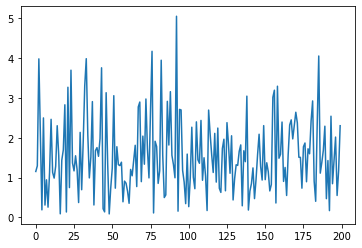

In [23]:
criterion=nn.NLLLoss()
learning_rate = 0.0005
import matplotlib.pyplot as plt

def train(category_tensor,line_tensor,category,line):
  all_losses=[]
  k=0
   #Sets gradients of all model parameters to zero.
  for i in range(400):
    for j in range(5):
      rnn.zero_grad()
      hidden=rnn.initHidden()
      # print(int(line_tensor[i][j].size()[1]/n_letters))
      output=rnn(line_tensor[i][j],hidden,n_letters)
      # print(output)
     

      loss=criterion(output,category_tensor[i][j])
      # print(loss)
      guess,guess_i=categoryFromOutput(output)
      correct='✓' if guess == category[i][j] else '✗ (%s)' %category[i][j]
      print('%d,%d%% %.4f %s / %s %s'%(i,i/400*100,loss,line[i][j],guess,correct))
      
      loss.backward()
    

      for p in rnn.parameters():
        p.data.add_(p.grad.data,alpha=-learning_rate) # Add parameters' gradients to their values, multiplied by learning rate
        # if p.grad.data == 'nan':
        #   p.grad.data=0.05
      k+=1
      if k%10==0:
        all_losses.append(loss)
    
  plt.plot(all_losses)
      
  return loss

# a,b,c,d=randomTrainingExample()
# # print(c)
# train(c,d)

print(train(target,data,Category,Line))


***CONFUSION MATRIX***

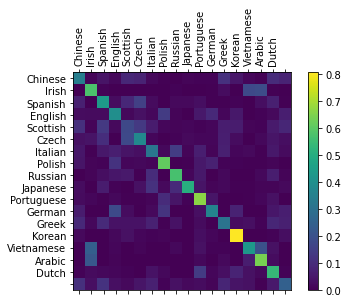

In [24]:
#keep track of correct guesses in confusion matrix
import matplotlib.ticker as ticker
confusion = torch.zeros(n_categories,n_categories)
n_confussion=10000
def evaluate(line_tensor):
  hidden = rnn.initHidden()
  output=rnn(line_tensor,hidden,n_letters)
  return output

for i in range (n_confussion):
  category,line,category_tensor,line_tensor=randomTrainingExample()
  output=evaluate(line_tensor)
  guess,guess_i=categoryFromOutput(output)
  category_i=all_categories.index(category)
  confusion[category_i][guess_i]+=1

for i in range(n_categories):
  confusion[i]  =confusion[i]/confusion[i].sum()

fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(confusion.numpy())
fig.colorbar(cax)

ax.set_xticklabels(all_categories,rotation=90)
ax.set_yticklabels(all_categories)
ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))
plt.show()

In [25]:
def predict(input_line,n_predictions=3):
  print('\n %s'%input_line)
  with torch.no_grad():
    output=evaluate(lineToTensor(input_line))
    topv,topi=output.topk(n_predictions)
    # predictions=[]

    for i in range(n_predictions):
      value=topv[0][i].item()
      category_index=topi[0][i].item()
      print('(%.2f) %s'%(value,all_categories[category_index]))

# predict('Dovesky')
# predict('Jackson')
predict('Johnson')


 Johnson
(-1.06) Scottish
(-1.26) English
(-2.13) Russian
